In [1]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, make_scorer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.base import clone
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
def evaluate_model(y_true = None, y_pred = None, title = '', cls_names = None, figsize = [12, 10]):
    results = {}
    results['accuracy'] = accuracy_score(y_true, y_pred)
    results['precision'] = precision_score(y_true, y_pred, average = "macro")
    results['recall'] = recall_score(y_true, y_pred, average = "macro")
    results['f1'] = f1_score(y_true, y_pred, average = "macro")
    # print model results
    print('Model Evaluation' if len(title) == 0 else f'Model Evaluation ({title})')
    print('====================')
    print(f'Accuracy  : {(results["accuracy"] * 100):.2f}%')
    print(f'Precision : {(results["precision"] * 100):.2f}%')
    print(f'Recall    : {(results["recall"] * 100):.2f}%')
    print(f'F1_score  : {(results["f1"] * 100):.2f}%')
    print(f'Classification_Report : \n{classification_report(y_true, y_pred, target_names = cls_names)}')
    # plot confusion matrix 
    plt.figure(figsize = figsize)
    sns.heatmap(
        confusion_matrix(y_true, y_pred), 
        fmt='d', annot=True,
        xticklabels=cls_names, 
        yticklabels=cls_names
    )
    plt.title('Confusion Matrix' if len(title) == 0 else f'Confusion Matrix ({title})', fontsize = 16)
    plt.xlabel('Predicted Labels', fontsize = 14)
    plt.ylabel('True Labels', fontsize = 14)
    plt.show()
    return results
# End Func

In [3]:
data_path = './data/dataset_cleaned_version.csv'

In [4]:
df = pd.read_csv(data_path)
df['dialect'] = pd.Categorical(df['dialect'])
df.head()

,cleaned_text,dialect
0,لكن بالنهايه ينتفض يغير,IQ
1,يعني هذا محسوب علي البشر حيونه ووحشيه وتطلبون ...,IQ
2,مبين من كلامه خليجي,IQ
3,يسلملي مرورك وروحك الحلوه,IQ
4,وين هل الغيبه اخ محمد,IQ


In [5]:
X = df['cleaned_text'].values.astype('U')
y = df['dialect'].values.codes
cls_names = df['dialect'].values.categories

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, stratify = y, random_state = 42)

In [7]:
bow_vectorizer = CountVectorizer(ngram_range=(1, 1))
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 1))
nb_model = MultinomialNB()

# Build up pipelines
pipeline_bow = Pipeline(
    steps=[
        ("vectorizer", clone(bow_vectorizer)), 
        ("nb_model", clone(nb_model))
    ]
)

pipeline_tfidf = Pipeline(
    steps=[
        ("vectorizer", clone(tfidf_vectorizer)), 
        ("nb_model", clone(nb_model))
    ]
)

In [8]:
# Code For Hyperparameter tuning
"""
# Hyperparameters
param_grid = {
    "vectorizer__ngram_range": [(1, 1), (1, 2), (1, 3), (2, 2), (2, 3), (3, 3)],
    "nb_model__alpha": [i / 10  for i in range(1, 11)],
}

# Speicify the used metric to get the best  
scorer = make_scorer(f1_score , average='macro')

# BOW
hyperparameters_tunner_bow = GridSearchCV(pipeline_bow, param_grid, scoring=scorer).fit(X, y)
print('The best hyperparameters BOW: ', hyperparameters_tunner_bow.best_params_)
print('The best score BOW: ', hyperparameters_tunner_bow.best_score_)

# TFIDF
hyperparameters_tunner_tfidf = GridSearchCV(pipeline_tfidf, param_grid, scoring=scorer).fit(X, y)
print('The best hyperparameters TFIDF: ', hyperparameters_tunner_tfidf.best_params_)
print('The best score TFIDF: ', hyperparameters_tunner_tfidf.best_score_)
"""

'\n# Hyperparameters\nparam_grid = {\n    "vectorizer__ngram_range": [(1, 1), (1, 2), (1, 3), (2, 2), (2, 3), (3, 3)],\n    "nb_model__alpha": [i / 10  for i in range(1, 11)],\n}\nscorer = make_scorer(f1_score , average=\'macro\')\n\n# BOW\nhyperparameters_tunner_bow = GridSearchCV(pipeline_bow, param_grid, scoring=scorer).fit(X, y)\nprint(\'The best hyperparameters BOW: \', hyperparameters_tunner_bow.best_params_)\nprint(\'The best score BOW: \', hyperparameters_tunner_bow.best_score_)\n\n# TFIDF\nhyperparameters_tunner_tfidf = GridSearchCV(pipeline_tfidf, param_grid, scoring=scorer).fit(X, y)\nprint(\'The best hyperparameters TFIDF: \', hyperparameters_tunner_tfidf.best_params_)\nprint(\'The best score TFIDF: \', hyperparameters_tunner_tfidf.best_score_)\n'

Model Evaluation (Naive Bayes using BOW)
Accuracy  : 48.50%
Precision : 66.01%
Recall    : 37.55%
F1_score  : 39.46%
Classification_Report : 
              precision    recall  f1-score   support

          AE       0.51      0.32      0.39      2630
          BH       0.44      0.15      0.22      2529
          DZ       0.78      0.34      0.47      1618
          EG       0.52      0.94      0.67      5764
          IQ       0.92      0.27      0.42      1550
          JO       0.57      0.16      0.25      2792
          KW       0.33      0.77      0.46      4211
          LB       0.68      0.62      0.65      2762
          LY       0.64      0.67      0.66      3650
          MA       0.93      0.41      0.56      1154
          OM       0.73      0.10      0.17      1912
          PL       0.39      0.68      0.49      4374
          QA       0.42      0.52      0.46      3107
          SA       0.49      0.29      0.36      2683
          SD       0.94      0.30      0.45    

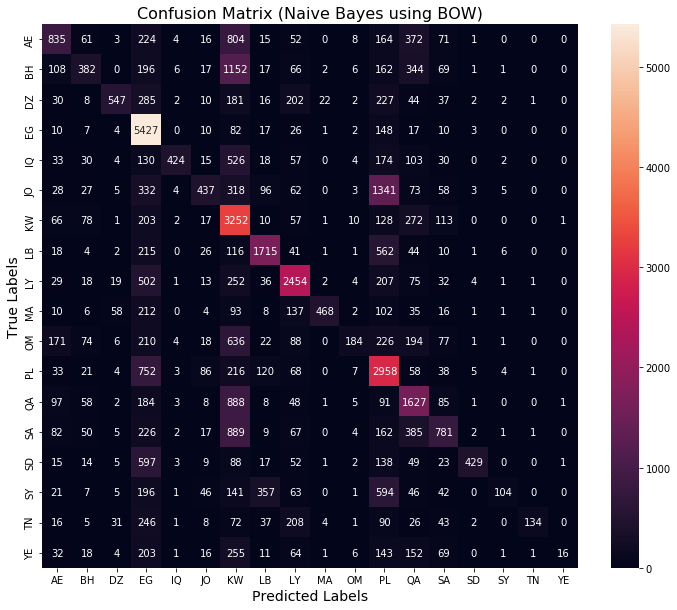

In [9]:
y_predict = pipeline_bow.fit(X_train, y_train).predict(X_test)
nb_bow_model_results = evaluate_model(
    y_true = y_test, 
    y_pred = y_predict, 
    title = 'Naive Bayes using BOW', 
    cls_names = cls_names, 
    figsize = [12, 10]
)

Model Evaluation (Naive Bayes using TFIDF)
Accuracy  : 39.35%
Precision : 73.61%
Recall    : 26.21%
F1_score  : 25.54%
Classification_Report : 
              precision    recall  f1-score   support

          AE       0.69      0.14      0.23      2630
          BH       0.66      0.05      0.09      2529
          DZ       0.89      0.16      0.27      1618
          EG       0.35      0.97      0.51      5764
          IQ       0.99      0.10      0.18      1550
          JO       0.68      0.05      0.10      2792
          KW       0.28      0.80      0.42      4211
          LB       0.80      0.42      0.55      2762
          LY       0.66      0.57      0.61      3650
          MA       0.97      0.18      0.31      1154
          OM       0.88      0.03      0.06      1912
          PL       0.33      0.65      0.44      4374
          QA       0.51      0.36      0.43      3107
          SA       0.61      0.13      0.21      2683
          SD       0.98      0.06      0.11  

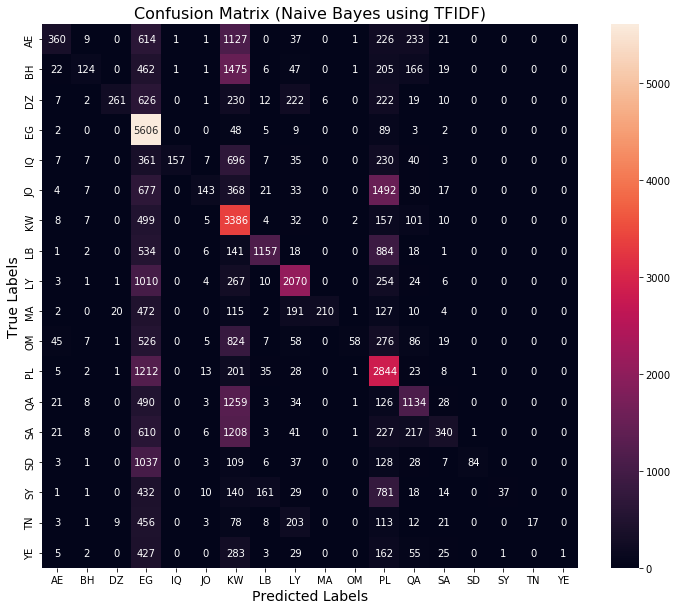

In [10]:
y_predict = pipeline_tfidf.fit(X_train, y_train).predict(X_test)
nb_tfidf_model_results = evaluate_model(
    y_true = y_test, 
    y_pred = y_predict, 
    title = 'Naive Bayes using TFIDF', 
    cls_names = cls_names, 
    figsize = [12, 10]
)